In [117]:
import pandas as pd
import numpy as np


In [118]:
zoo=pd.read_csv("zoo.csv")
zoo_acctual=zoo

In [119]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [120]:
zoo.class_type.unique()


array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [121]:
#  from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(zoo[:,-1])
# le.classes_



In [122]:
zoo=zoo.drop(['animal_name'], axis = 1)
zoo=zoo.values
zoo

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]], dtype=int64)

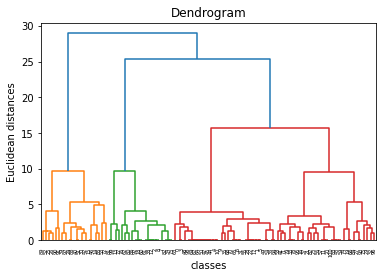

In [123]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(zoo, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('classes')
plt.ylabel('Euclidean distances')
plt.show()

In [124]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(zoo)
y_hc

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0], dtype=int64)

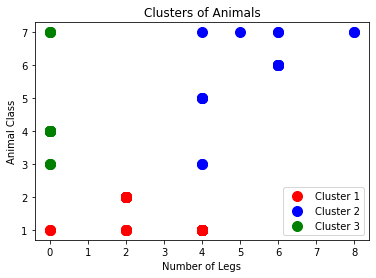

In [125]:
plt.scatter(zoo[y_hc == 0, 12], zoo[y_hc == 0, 16], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(zoo[y_hc == 1, 12], zoo[y_hc == 1, 16], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(zoo[y_hc == 2, 12], zoo[y_hc == 2, 16], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Animals')
plt.xlabel('Number of Legs')
plt.ylabel('Animal Class')
plt.legend()
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(zoo_acctual['class_type'], y_hc)
mse

7.564356435643564